In [384]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [228]:
# all

In [326]:
all_data = ''
for file in os.listdir('../data/all'):
    if file.startswith('part-'):
        all_data += open('../data/all/' + file, 'r').read()
        
all_data = all_data[:len(all_data) - 1]

In [327]:
weather = []
crimes = []

all_data = all_data.split('\n')
for data in all_data:
    data = data.split(',')
    # linear
    #weather.append([int(data[0]), int(data[1]), int(data[2]), int(data[3]), int(data[4])])
    
    # quadratic
    weather.append([int(data[0]), int(data[0])**2, int(data[1]), int(data[2]), int(data[3]), int(data[4]), int(data[4])**2])
    
    # only temp and humidity
    #weather.append([int(data[0]), int(data[0])**2, int(data[4]), int(data[4])**2])

    crimes.append(int(data[5]))

In [328]:
# linear

train_x = np.array(weather[:-int(0.2*len(weather))])
train_y = crimes[:-int(0.2*len(crimes))]

In [329]:
test_x = np.array(weather[-int(0.2*len(weather)):])
test_y = crimes[-int(0.2*len(crimes)):]

In [330]:
# model

In [331]:
lr = linear_model.LinearRegression()

In [332]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

0.30804388424560125

In [336]:
# temperature

In [366]:
temp_data = ''
for file in os.listdir('../data/temperature'):
    if file.startswith('part-'):
        temp_data += open('../data/temperature/' + file, 'r').read()
        
temp_data = temp_data[:len(temp_data) - 1]

In [367]:
temps = []
crimes = []

temp_data = temp_data.split('\n')
for data in temp_data:
    data = data.split(',')
    temps.append(int(data[0]))
    crimes.append(int(data[1]))

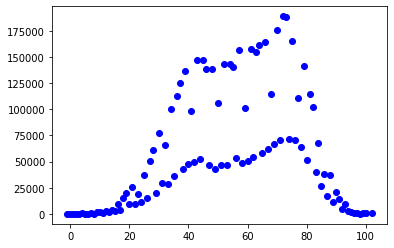

In [368]:
plt.plot(temps, crimes, 'bo')

In [371]:
# linear

train_x = np.array(temps[:-int(0.2*len(temps))]).reshape(-1, 1)
train_y = crimes[:-int(0.2*len(crimes))]

In [372]:
test_x = np.array(temps[-int(0.2*len(temps)):]).reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

In [377]:
# quadratic

train_x = temps[:-int(0.2*len(temps))]
for i in range(len(train_x)):
    train_x[i] = [train_x[i], train_x[i]**2]
train_x = np.array(train_x)

train_y = crimes[:-int(0.2*len(crimes))]

In [378]:
test_x = temps[-int(0.2*len(temps)):]
for i in range(len(test_x)):
    test_x[i] = [test_x[i], test_x[i]**2]
test_x = np.array(test_x)

test_y = crimes[-int(0.2*len(crimes)):]

In [379]:
# model

In [380]:
lr = linear_model.LinearRegression()

In [381]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [382]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

0.5930524173736265

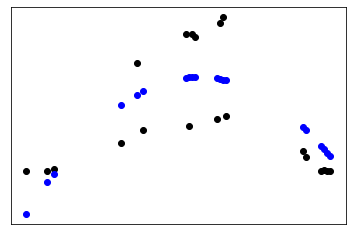

In [383]:
test_x = np.array(temps[-int(0.2*len(temps)):]).reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [365]:
X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     39.75
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.03e-12
Time:                        18:14:21   Log-Likelihood:                -994.83
No. Observations:                  83   AIC:                             1996.
Df Residuals:                      80   BIC:                             2003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.527e+04   1.23e+04     -3.669      0.0

In [385]:
# temperature bins

In [386]:
temp_bins = []
for t in temps:
    new_t = (t + 5) // 10 * 10
    if new_t not in temp_bins:
        temp_bins.append(new_t)

temp_bins.sort()
    
crime_bins = [0 for t in temp_bins]
for i in range(len(crimes)):
    crime_bins[(temps[i] + 5) // 10] += crimes[i]

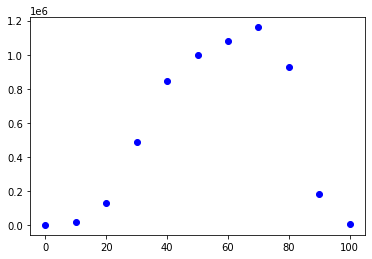

In [387]:
plt.plot(temp_bins, crime_bins, 'bo')

In [402]:
# linear

train_x = np.array(temp_bins[:-int(0.2*len(temp_bins))]).reshape(-1, 1)
train_y = crime_bins[:-int(0.2*len(crime_bins))]

In [403]:
test_x = np.array(temp_bins[-int(0.2*len(temp_bins)):]).reshape(-1, 1)
test_y = crime_bins[-int(0.2*len(crime_bins)):]

In [410]:
# quadratic

train_x = temp_bins[:-int(0.2*len(temp_bins))]
for i in range(len(train_x)):
    train_x[i] = [train_x[i], train_x[i]**2]
train_x = np.array(train_x)

train_y = crime_bins[:-int(0.2*len(crime_bins))]

In [411]:
test_x = temp_bins[-int(0.2*len(temp_bins)):]
for i in range(len(test_x)):
    test_x[i] = [test_x[i], test_x[i]**2]
test_x = np.array(test_x)

test_y = crime_bins[-int(0.2*len(crime_bins)):]

In [412]:
# model

In [413]:
lr = linear_model.LinearRegression()

In [414]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [415]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

-116.29084414797498

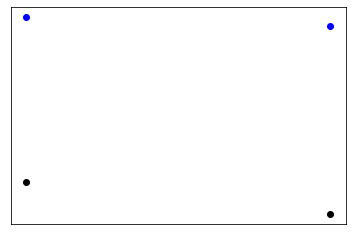

In [416]:
test_x = np.array(temp_bins[-int(0.2*len(temp_bins)):]).reshape(-1, 1)
test_y = crime_bins[-int(0.2*len(crime_bins)):]

plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [417]:
X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     29.27
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           0.000803
Time:                        18:22:11   Log-Likelihood:                -119.18
No. Observations:                   9   AIC:                             244.4
Df Residuals:                       6   BIC:                             245.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.883e+05   1.36e+05     -1.387      0.2

/Users/vaibgadodia/.virtualenvs/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [49]:
# humidity

In [191]:
humid_data = ''
for file in os.listdir('../data/humidity'):
    if file.startswith('part-'):
        humid_data += open('../data/humidity/' + file, 'r').read()
        
humid_data = humid_data[:len(humid_data) - 1]

In [192]:
hpercentages = []
crimes = []

humid_data = humid_data.split('\n')
for data in humid_data:
    data = data.split(',')
    hpercentages.append(int(data[0]))
    crimes.append(int(data[1]))

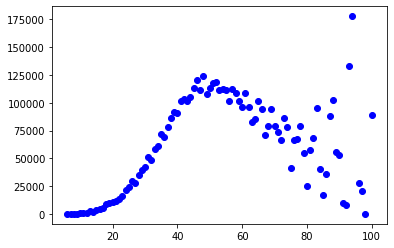

In [193]:
plt.plot(hpercentages, crimes, 'bo')

In [194]:
# linear

train_x = np.array(hpercentages[:-int(0.2*len(hpercentages))]).reshape(-1, 1)
train_y = crimes[:-int(0.2*len(crimes))]

In [195]:
test_x = np.array(hpercentages[-int(0.2*len(hpercentages)):]).reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

In [201]:
# quadratic

train_x = hpercentages[:-int(0.2*len(hpercentages))]
for i in range(len(train_x)):
    train_x[i] = [train_x[i], train_x[i]**2]
train_x = np.array(train_x)

train_y = crimes[:-int(0.2*len(crimes))]

In [202]:
test_x = hpercentages[-int(0.2*len(hpercentages)):]
for i in range(len(test_x)):
    test_x[i] = [test_x[i], test_x[i]**2]
test_x = np.array(test_x)

test_y = crimes[-int(0.2*len(crimes)):]

In [203]:
# model

In [204]:
lr = linear_model.LinearRegression()

In [205]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

0.6753009643519624

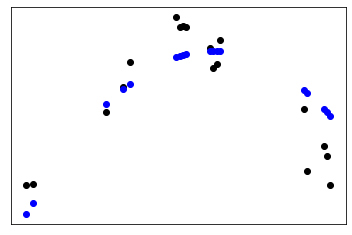

In [207]:
plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [208]:
# rain

In [209]:
rain_data = ''
for file in os.listdir('../data/rain'):
    if file.startswith('part-'):
        rain_data += open('../data/rain/' + file, 'r').read()
        
rain_data = rain_data[:len(rain_data) - 1]

In [210]:
rain = []
crimes = []

rain_data = rain_data.split('\n')
for data in rain_data:
    data = data.split(',')
    rain.append(int(data[0]))
    crimes.append(int(data[1]))

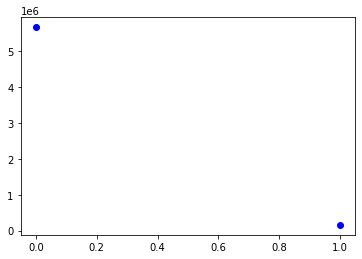

In [56]:
plt.plot(rain, crimes, 'bo')

In [53]:
# snow

In [60]:
snow_data = ''
for file in os.listdir('../data/snow'):
    if file.startswith('part-'):
        snow_data += open('../data/snow/' + file, 'r').read()
        
snow_data = snow_data[:len(snow_data) - 1]

In [61]:
snow = []
crimes = []

snow_data = snow_data.split('\n')
for data in snow_data:
    data = data.split(',')
    snow.append(int(data[0]))
    crimes.append(int(data[1]))

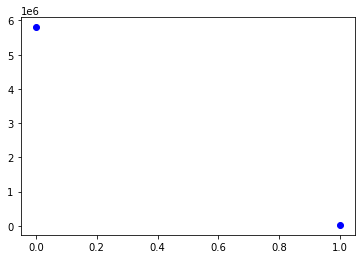

In [62]:
plt.plot(snow, crimes, 'bo')

In [63]:
# fog

In [64]:
fog_data = ''
for file in os.listdir('../data/fog'):
    if file.startswith('part-'):
        fog_data += open('../data/fog/' + file, 'r').read()
        
fog_data = fog_data[:len(fog_data) - 1]

In [65]:
fog = []
crimes = []

fog_data = fog_data.split('\n')
for data in fog_data:
    data = data.split(',')
    fog.append(int(data[0]))
    crimes.append(int(data[1]))

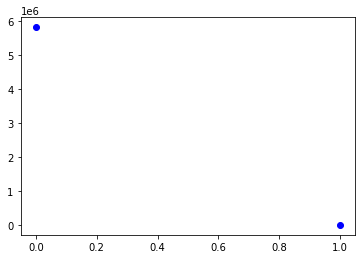

In [66]:
plt.plot(fog, crimes, 'bo')